# AT82.08 Computer Vision Final Exam 2024

`Change the filename by inserting your student ID before submitting the file.`

# Question 1: Object Detection (10 points)
We've explored the evolution of the `R-CNN family`, encompassing `R-CNN`, `Fast R-CNN`, and `Faster R-CNN`. Analyze the key differences between these models, identifying their respective limitations and the specific challenges they were developed to overcome.

Object detection detects the objects of a certain class in the image and videos. It locates the position of the object by identifying the object's bounding box coordinates and assigns class value.

R-CNN is a two-stage object detection model that belongs to R-CNN family of models which are work in region-based principle. This method uses selective search to extract nearly 2k regions which are called regions of interest. R-CNN divides an image into regions and then classifies with localization objects within those regions. This method uses single CNN network to extract features, and generates regions dynamically based on visual content of the image.

Steps:
1. First it does image segmentation - segmenting the image into smaller regions based on color, texter size, shape, luminicty, and other features using Feizenszwalb's segmentation algorithm. These regions are called superpixels.
2. Then it applies Selective search algorithm which uses greedy algorithm to merge similar regions iteratively.
3. Then Hierarchical Grouping - generates hierarchical tree of region proposals.
4. Then again applies selective search to generate nearly 2k regions of interest.
5. Then those regions are fed into cnn feature extractor network, and those features are directed to SVM classifier to classify the precense of object. In addition to predicting the presence of an object within the region proposals, the algorithm also predicts four values which are offset values to increase the precision of the bounding box.
6. To compare boxes, R-CNN uses Intersection over Union - Jaccard similarity metric. The highest ones are selected.
7. To eliminate overlapping boxes, Non-Max Suppression (NMS) is used - but it also has problem of eliminating good boxes when objects highly overlap.
8. To evaluate object detector - it uses mean average Precision (mAP)

R-CNN predicts a transform $(t_x, t_y, t_w, t_h)$ to correct region proposal bounding box.

Problems of R-CNN:
1. It is very slow during both training and inferencing since classifying 2k region proposals per image is a time-consuming process.
2. Selective Search algorithm is a fixed algorithm which has no learning option. This could lead to the generation of bad candidate region proposals.


Fast R-CNN - deals with some drawbacks of R-CNN by making it faster object detection algorithm. It is the same algorithm, but instead of applying heuristic selective search algorithm to obtain 2k region proposals, let's first extract feature maps by feeding image into cnn network. From those feature maps, we identify the region proposals and warp them into squares, and by using ROI pooling layer we reshape them into a fixed size so that we can feed it into fully connected linear layer. From ROI feature map, we use softmax to predict the class of proposed region and also the offset values of the bounding box.

The fast keypoint here means that we do not need to feed 2k region proposals into cnn network every time, but do the convolution operation once per image to obtain feature map.

![image](diff.png)

From the image above, fast R-CNN is significantly faster in training, but for testing including region proposals slows down the algorithm significantly when compared to not using region proposals. Therefore, region proposals become bottlenecks in Fast R-CNN algorithm affecting its performance.

Faster R-CNN. Both abovementioned methods uses selective search to find out the region proposals. Selective search is slow and time-consuming process. Faster R-CNN is the same method but without selective search algorithm instead learns the region proposals - Region Proposal Network (RPN). Similar to Fast R-CNN, the image is provided as an input to a convolutional network which provides a convolutional feature map. Instead of using selective search algorithm on the feature map to identify the region proposals, a separate network is used to predict the region proposals. The predicted region proposals are then reshaped using a RoI pooling layer which is then used to classify the image within the proposed region and predict the offset values for the bounding boxes.

Faster R-CNN is also introduced anchor boxes technique for predicting bounding boxes that was later utilized by YOLO. It is trained with 4 losses:
1. RPN classification: anchor box is object / not an object.
2. RPN regression: predict transform from anchor box to proposal box.
3. Object classification: classify proposals as background / object class.
4. Object regression: predict transform from proposal box to object box.

Faster R-CNN is two-stage detector: first stage - runs once per the image - backbone network (extract features), region proposal network (generation region proposals), and second satge - runs once per region - crop features (roi pool/align), predict object class, predict bbox offset. Two-stage detector means it is still slow for real-time detection.

![image2](diff2.png)

But it can be seen that Faster R-CNN was a lot faster then its predecessors. Modern approaches utilize YOLO architecture, and R-CNN family was good backbone in research to come up much efficient solutions. Next method in R-CNN family is Mask R-CNN which is used for segmentation task.

---

# Question 2: GAN


## Question 2.1 (35 points)

In week 11 lecture, we learnt and implemented GAN in which the generator and discriminator were constructed with only linear layers, and trained using MNIST dataset. We observed that the quality of genereted images was not good, and needed further improvement.

[DCGAN](https://arxiv.org/pdf/1511.06434.pdf) is an extension of the GAN, in which it explicitly uses `convolutional` and `convTransposed` layers in the discriminator and generator, respectively. In other words, DCGAN replaces linear layers in GAN with `conv.` layers in the discriminator, and `convTranspose` layers in the generator.

Use the following guideline to `Implement DCGAN model`:
- at least `4 conv. layers` in the `discrimimator`.
- at least `4 convTranspose layers` in the `generator`.
- latent vector `z = 100` and being sample from `normal` distribution
- Use `batchnorm` in both the generator and the discriminator.
- Use `ReLU` activation in generator for all layers except for the output, which uses `Tanh`.
- Use `LeakyReLU` activation in the discriminator for all layers.


Train the model
- `MNIST` dataset
- `25` epochs
- batch size of `128`

**`Report the following`**
- Plot both generator and discriminator `losses`.
- Show the visualization of the generated images of `every 5 epochs`

In [ ]:
# Your answer here

## Question 2.2 (10 points)

Recall from our GAN lab session, we implemented and trained GAN on MNIST dataset.

**Qualitative Comparison**: Conduct a comparative analysis of the image outputs generated by `GAN` and `DCGAN` models at the `25th` epoch. Determine which model produces better quality images and discuss the underlying reasons for its superior performance.

GAN at 25th epoch:

![img3gan](gan.png)

From the trained DCGAN it is hardly observable anything notation oriented. And if we look at the loss graph, we can observe that discriminator is outperforming the generator, probably there is some issues with model configuration - no time for training over again (it is taking almost 40 minutes to train).

If we make assumption based on that example we can say that GAN is better for generating images since the visualization from gan part looks much better. But I believe, DCGAN have to be better.

# Question 3: Mean Shift (25 points)
As previously discussed, Mean Shift segmentation leverages Euclidean distance to cluster pixels in a feature space defined by pixel attributes. While we have utilized RGB color information as features, incorporating additional spatial information may enhance segmentation performance. By augmenting the feature space to include pixel coordinates (X,Y), we can apply Mean Shift to this expanded representation.


#### Implement Mean Shift segmentation using the `XYRGB` space of the given image (`q3-labrador-kmean.jpg`).
- How does the performance compare to using only the RGB color space?
- Show the center of clusters, how many clusters are there?

In [ ]:
# Your code here

In [18]:
# Example of turning nx3 (RGB) array of image pixels to nx5 (XYRGB) array of image pixels

,r,g,b,x,y
0,133,169,219,0,0
1,133,169,219,0,1
2,133,169,219,0,2
3,133,169,219,0,3
4,134,170,220,0,4
5,134,170,220,0,5
6,135,171,221,0,6
7,135,171,221,0,7
8,135,171,221,0,8
9,135,171,221,0,9


In [ ]:
# Show the center of clusters, how many clusters are there?

**Expected result**

You may get a slight different result.

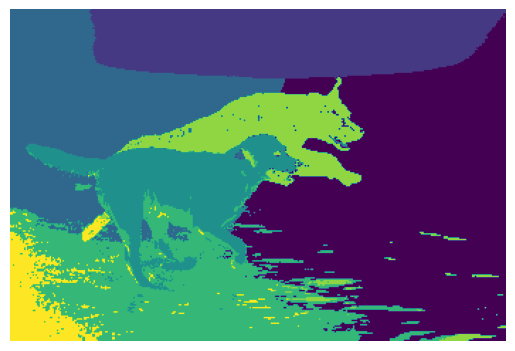

In [24]:
plt.axis('off')
plt.imshow(segmented_image)
plt.show()

# Question 4: 3D Deep Learning

## Question 4.1: (10 points)
We have discussed five 3D reprensentations used in 3D Deep learning for tasks like classification and segmentation.

- ### What are those 5 representations ? Briefly describe attributes of each representation.
- ### Analyze the advantages and disadvantages of each representation when applied to deep learning models

*Your answer here!*

---

## Question 4.2: (10 points)

`PointNet` is a pioneering 3D deep learning model capable of handling point cloud data for classification and segmentation tasks. Unlike traditional image data, point clouds lack a regular grid structure and the order of points is arbitrary.

Discuss the strategies employed by PointNet to overcome these challenges and highlight its significant contributions to the field of 3D deep learning.


*Your answer here!*

---